In [1]:
def treat_outliers(data, column):
    """
    Treat outliers in a given column of a DataFrame using IQR-based capping.
    Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR will be capped.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define caps
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to process user data
def process_user_data(mouse_file, pupil_file):
    click_data = pd.read_csv(mouse_file)
    pupil_data = pd.read_csv(pupil_file)

    # Convert timestamps to numeric timecodes
    click_data['Timecode (seconds)'] = pd.to_numeric(click_data['Timecode (seconds)'], errors='coerce')
    pupil_data['timecode'] = pd.to_numeric(pupil_data['timecode'], errors='coerce')

    # Replace zeros with the mean of non-zero values
    non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
    pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)
    
    pupil_data = treat_outliers(pupil_data, 'pupil-area')

    # Min-Max normalization
    min_val = pupil_data['pupil-area'].min()
    max_val = pupil_data['pupil-area'].max()
    pupil_data['normalized-pupil-area'] = (pupil_data['pupil-area'] - min_val) / (max_val - min_val)

    # Pre- and post-click analysis
    def calculate_pre_post_pupil_areas(click_data, pupil_data):
        results = []
        for _, click_row in click_data.iterrows():
            click_time = click_row['Timecode (seconds)']

            # Pre-click and post-click windows
            pre_click = pupil_data[(pupil_data['timecode'] >= click_time - 5) & (pupil_data['timecode'] < click_time)]
            post_click = pupil_data[(pupil_data['timecode'] >= click_time + 2) & (pupil_data['timecode'] < click_time + 5)]

            results.append({
                'Pre-Click Avg Pupil Area': pre_click['normalized-pupil-area'].mean(),
                'Post-Click Avg Pupil Area': post_click['normalized-pupil-area'].mean()
            })
        return pd.DataFrame(results)

    return calculate_pre_post_pupil_areas(click_data[click_data['Is Promotional'] == True], pupil_data)

# V2 vs V3 (Kinda useless)

In [6]:
# # Compare V2 and V3
# def compare_v2_v3(v2_mouse_files, v2_pupil_files, v3_mouse_files, v3_pupil_files):
#     all_v2_results = []
#     all_v3_results = []

#     # Pair files for V2
#     for v2_mouse, v2_pupil in zip(v2_mouse_files, v2_pupil_files):
#         v2_results = process_user_data(v2_mouse, v2_pupil)
#         all_v2_results.append(v2_results)

#     # Pair files for V3
#     for v3_mouse, v3_pupil in zip(v3_mouse_files, v3_pupil_files):
#         v3_results = process_user_data(v3_mouse, v3_pupil)
#         all_v3_results.append(v3_results)

#     # Combine results
#     combined_v2 = pd.concat(all_v2_results, ignore_index=True)
#     combined_v3 = pd.concat(all_v3_results, ignore_index=True)

#     return combined_v2, combined_v3

# # Compare differences between V2 and V3
# def compare_differences(combined_v2, combined_v3):
#     diff_pre_click = combined_v3['Pre-Click Avg Pupil Area'] - combined_v2['Pre-Click Avg Pupil Area']
#     diff_post_click = combined_v3['Post-Click Avg Pupil Area'] - combined_v2['Post-Click Avg Pupil Area']

#     # Combine into a single dataframe
#     differences = pd.DataFrame({
#         'Pre-Click Difference': diff_pre_click,
#         'Post-Click Difference': diff_post_click
#     })

#     return differences

# # File lists for V2 and V3
# v2_mouse_files = ['anushka2.csv', 'aryaman2.csv', 'jain2.csv', 'priyanshu2.csv', 'rhea2.csv', 'amog2.csv','priyansh2.csv','priyanshu2.csv','sani2.csv','suhani2.csv','surabhi2.csv','tanya2.csv','trusha2.csv','vaish2.csv']
# v2_pupil_files = ['anuksha_v2.csv', 'aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv', 'amog_v2.csv', 'priyansh_v2.csv', 'priyanshu_v2.csv', 'sanidhya_v2.csv', 'suhani_v2.csv','surabhi_v2.csv', 'tanya_v2.csv', 'trusha_v2.csv', 'vaish_v2.csv']

# v3_mouse_files = ['anushka3.csv', 'aryaman3.csv', 'jain3.csv', 'priyanshu3.csv', 'rhea3.csv', 'amog3.csv','priyansh3.csv','priyanshu3.csv','sani3.csv','suhani3.csv','surabhi3.csv','tanya3.csv','trusha3.csv','vaish3.csv']
# v3_pupil_files = ['anuksha_v3.csv', 'aryamann_v3.csv', 'jain_v3.csv', 'priyanshu_v3.csv', 'rhea_v3.csv',  'amog_v3.csv', 'priyansh_v3.csv', 'priyanshu_v3.csv', 'sanidhya_v3.csv', 'suhani_v3.csv','surabhi_v3.csv', 'tanya_v3.csv', 'trusha_v3.csv', 'vaish_v3.csv']


# # Compare V2 and V3
# combined_v2_results, combined_v3_results = compare_v2_v3(v2_mouse_files, v2_pupil_files, v3_mouse_files, v3_pupil_files)

# # Calculate differences
# differences = compare_differences(combined_v2_results, combined_v3_results)

# # Display summary
# print("\n### V2 Summary ###")
# print(combined_v2_results.describe())

# print("\n### V3 Summary ###")
# print(combined_v3_results.describe())

# print("\n### Differences Between V2 and V3 ###")
# print(differences.describe())

# # Visualize Differences
# plt.figure(figsize=(20, 6), dpi=90)

# plt.boxplot([
#     differences['Pre-Click Difference'].dropna(),
#     differences['Post-Click Difference'].dropna()
# ], labels=['Pre-Click Difference', 'Post-Click Difference'])

# plt.title("Differences in Pupil Area Between V2 and V3")
# plt.ylabel("Difference in Normalized Pupil Area")
# plt.grid(True)
# plt.show()


# V2 vs V3

### V2 Pre-Click vs Post-Click ###
       Pre-Click Avg Pupil Area  Post-Click Avg Pupil Area
count                 58.000000                  58.000000
mean                   0.472628                   0.459620
std                    0.086571                   0.117897
min                    0.330577                   0.256777
25%                    0.413770                   0.362796
50%                    0.455179                   0.458882
75%                    0.536448                   0.531475
max                    0.664955                   0.871847


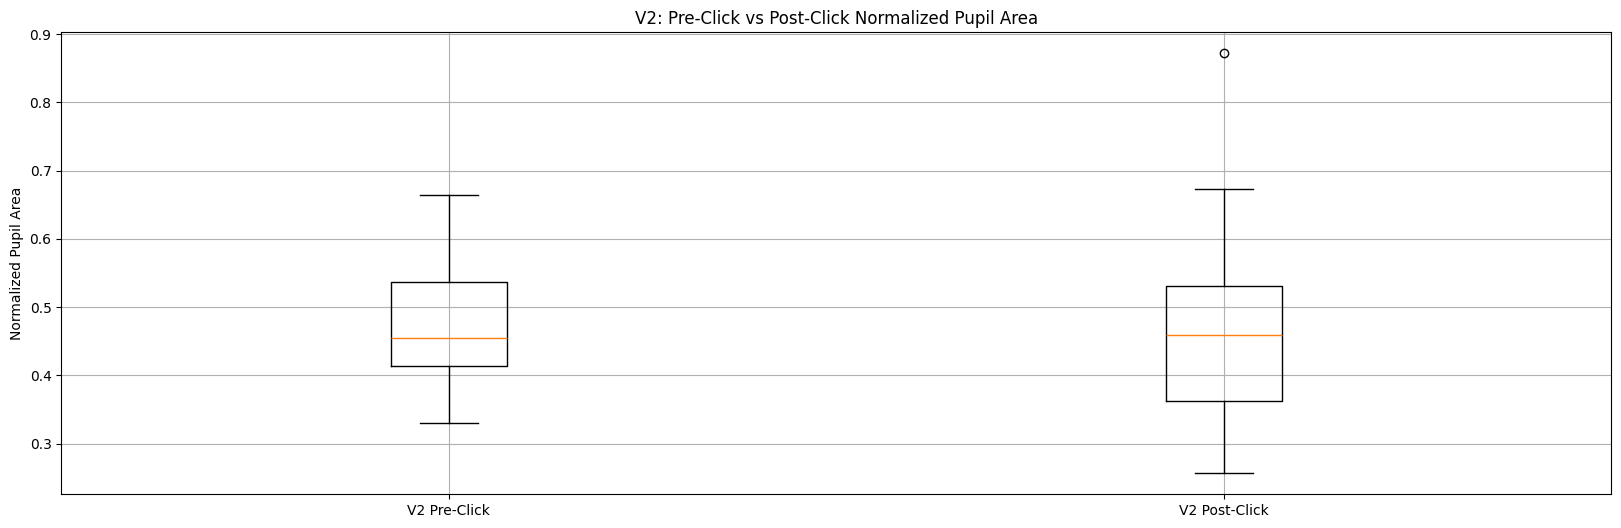

### V3 Pre-Click vs Post-Click ###
       Pre-Click Avg Pupil Area  Post-Click Avg Pupil Area
count                 39.000000                  39.000000
mean                   0.502998                   0.523406
std                    0.095387                   0.101425
min                    0.316700                   0.352006
25%                    0.439899                   0.430711
50%                    0.513395                   0.518407
75%                    0.576316                   0.593300
max                    0.664697                   0.722417


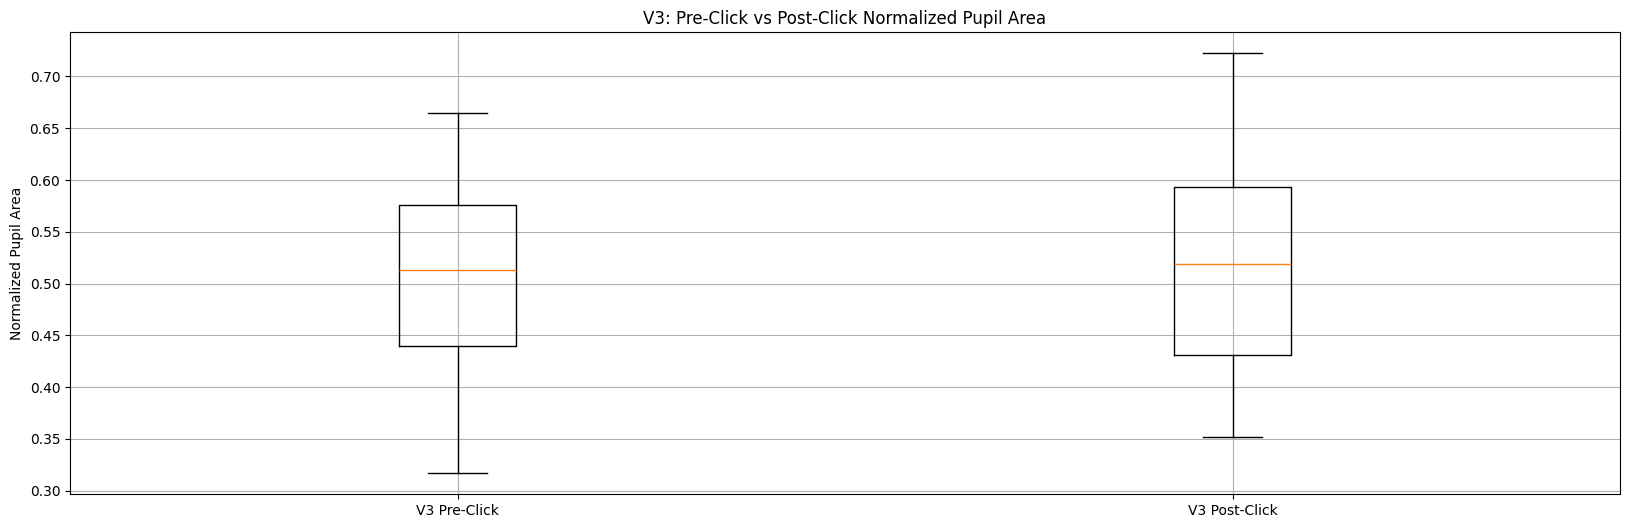

### Post-Click: V2 vs V3 ###
       V2 Post-Click  V3 Post-Click
count      58.000000      39.000000
mean        0.459620       0.523406
std         0.117897       0.101425
min         0.256777       0.352006
25%         0.362796       0.430711
50%         0.458882       0.518407
75%         0.531475       0.593300
max         0.871847       0.722417


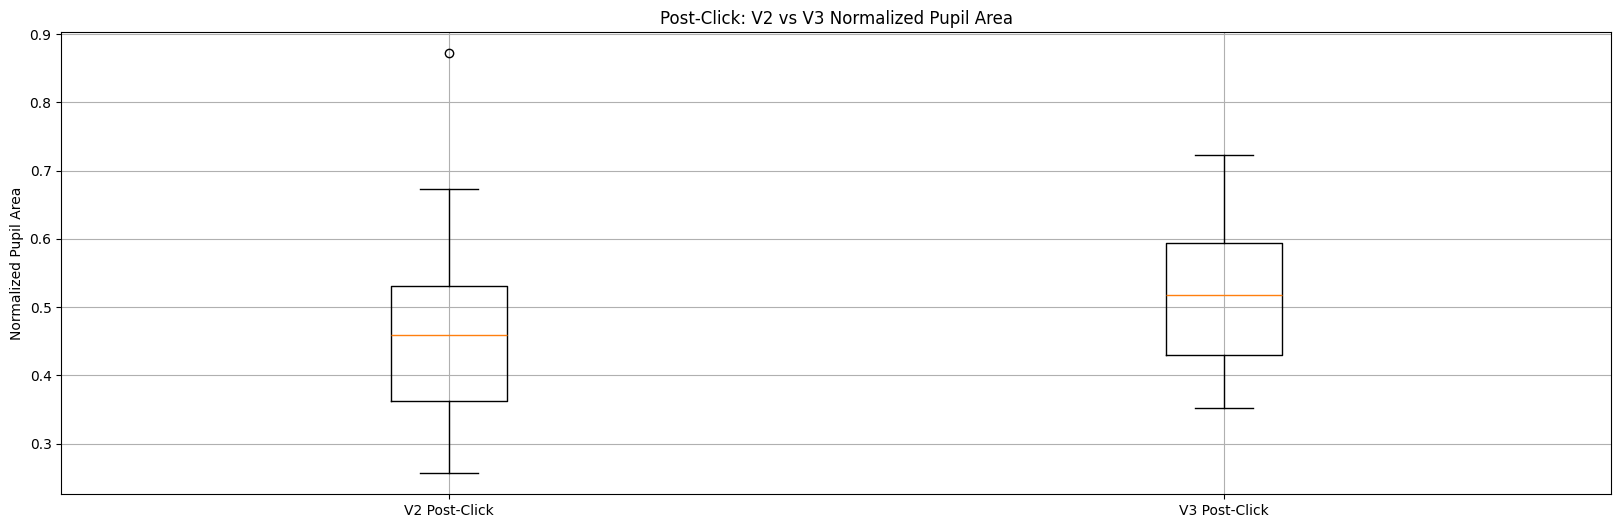

In [4]:
# Compare V2 and V3
def compare_versions(v2_mouse_files, v2_pupil_files, v3_mouse_files, v3_pupil_files):
    all_v2_results = []
    all_v3_results = []

    # Process V2
    for v2_mouse, v2_pupil in zip(v2_mouse_files, v2_pupil_files):
        v2_results = process_user_data(v2_mouse, v2_pupil)
        all_v2_results.append(v2_results)

    # Process V3
    for v3_mouse, v3_pupil in zip(v3_mouse_files, v3_pupil_files):
        v3_results = process_user_data(v3_mouse, v3_pupil)
        all_v3_results.append(v3_results)

    # Combine results
    combined_v2 = pd.concat(all_v2_results, ignore_index=True)
    combined_v3 = pd.concat(all_v3_results, ignore_index=True)

    return combined_v2, combined_v3

# File lists for V2 and V3
v2_mouse_files = ['anushka2.csv', 'aryaman2.csv', 'jain2.csv', 'priyanshu2.csv', 'rhea2.csv', 'amog2.csv','priyansh2.csv','priyanshu2.csv','sani2.csv','suhani2.csv','surabhi2.csv','tanya2.csv','trusha2.csv','vaish2.csv']
v2_pupil_files = ['anuksha_v2.csv', 'aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv', 'amog_v2.csv', 'priyansh_v2.csv', 'priyanshu_v2.csv', 'sanidhya_v2.csv', 'suhani_v2.csv','surabhi_v2.csv', 'tanya_v2.csv', 'trusha_v2.csv', 'vaish_v2.csv']

v3_mouse_files = ['anushka3.csv', 'aryaman3.csv', 'jain3.csv', 'priyanshu3.csv', 'rhea3.csv', 'amog3.csv','priyansh3.csv','priyanshu3.csv','sani3.csv','suhani3.csv','surabhi3.csv','tanya3.csv','trusha3.csv','vaish3.csv']
v3_pupil_files = ['anuksha_v3.csv', 'aryamann_v3.csv', 'jain_v3.csv', 'priyanshu_v3.csv', 'rhea_v3.csv',  'amog_v3.csv', 'priyansh_v3.csv', 'priyanshu_v3.csv', 'sanidhya_v3.csv', 'suhani_v3.csv','surabhi_v3.csv', 'tanya_v3.csv', 'trusha_v3.csv', 'vaish_v3.csv']

# Compare V2 and V3
combined_v2, combined_v3 = compare_versions(v2_mouse_files, v2_pupil_files, v3_mouse_files, v3_pupil_files)

# 1. Compare Pre-Click vs Post-Click in V2
print("### V2 Pre-Click vs Post-Click ###")
print(combined_v2.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([combined_v2['Pre-Click Avg Pupil Area'].dropna(),
             combined_v2['Post-Click Avg Pupil Area'].dropna()],
            labels=['V2 Pre-Click', 'V2 Post-Click'])
plt.title("V2: Pre-Click vs Post-Click Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()

# 2. Compare Pre-Click vs Post-Click in V3
print("### V3 Pre-Click vs Post-Click ###")
print(combined_v3.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([combined_v3['Pre-Click Avg Pupil Area'].dropna(),
             combined_v3['Post-Click Avg Pupil Area'].dropna()],
            labels=['V3 Pre-Click', 'V3 Post-Click'])
plt.title("V3: Pre-Click vs Post-Click Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()

# 3. Compare Post-Click in V2 vs Post-Click in V3
print("### Post-Click: V2 vs V3 ###")
post_click_v2 = combined_v2['Post-Click Avg Pupil Area'].dropna()
post_click_v3 = combined_v3['Post-Click Avg Pupil Area'].dropna()

comparison_df = pd.DataFrame({'V2 Post-Click': post_click_v2, 'V3 Post-Click': post_click_v3})
print(comparison_df.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([post_click_v2, post_click_v3], labels=['V2 Post-Click', 'V3 Post-Click'])
plt.title("Post-Click: V2 vs V3 Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()


# V2 vs V4

### V2 Pre-Click vs Post-Click ###
       Pre-Click Avg Pupil Area  Post-Click Avg Pupil Area
count                 45.000000                  45.000000
mean                   0.477217                   0.463333
std                    0.088882                   0.121245
min                    0.330577                   0.280228
25%                    0.415654                   0.369232
50%                    0.455508                   0.451316
75%                    0.537939                   0.530280
max                    0.664955                   0.871847


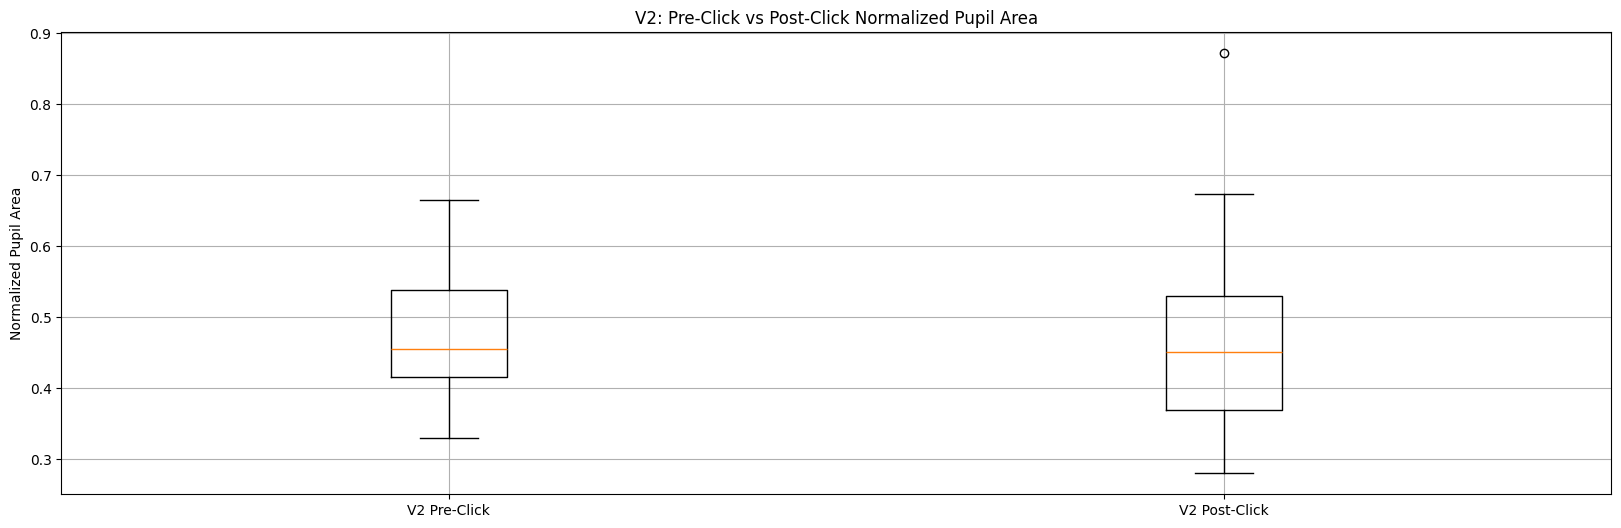

### V4 Pre-Click vs Post-Click ###
       Pre-Click Avg Pupil Area  Post-Click Avg Pupil Area
count                 20.000000                  20.000000
mean                   0.418988                   0.471977
std                    0.091719                   0.114076
min                    0.243069                   0.272679
25%                    0.379219                   0.391250
50%                    0.425103                   0.463967
75%                    0.478247                   0.536045
max                    0.602410                   0.728599


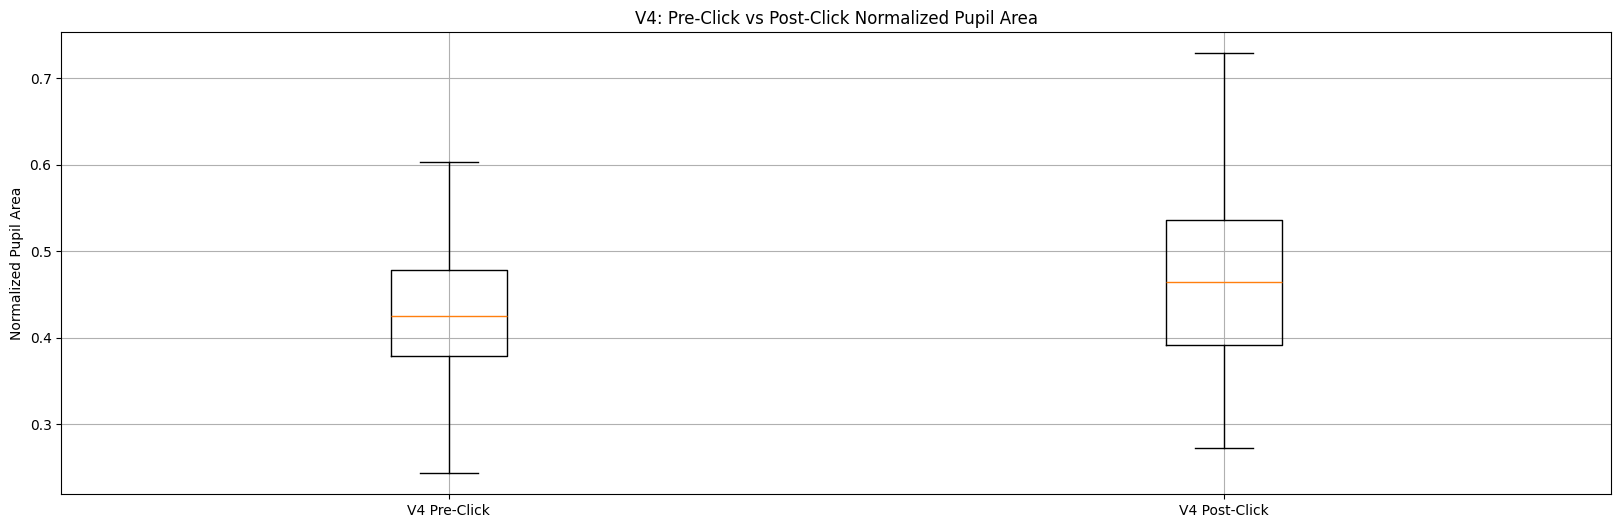

### Post-Click: V2 vs V4 ###
       V2 Post-Click  V4 Post-Click
count      45.000000      20.000000
mean        0.463333       0.471977
std         0.121245       0.114076
min         0.280228       0.272679
25%         0.369232       0.391250
50%         0.451316       0.463967
75%         0.530280       0.536045
max         0.871847       0.728599


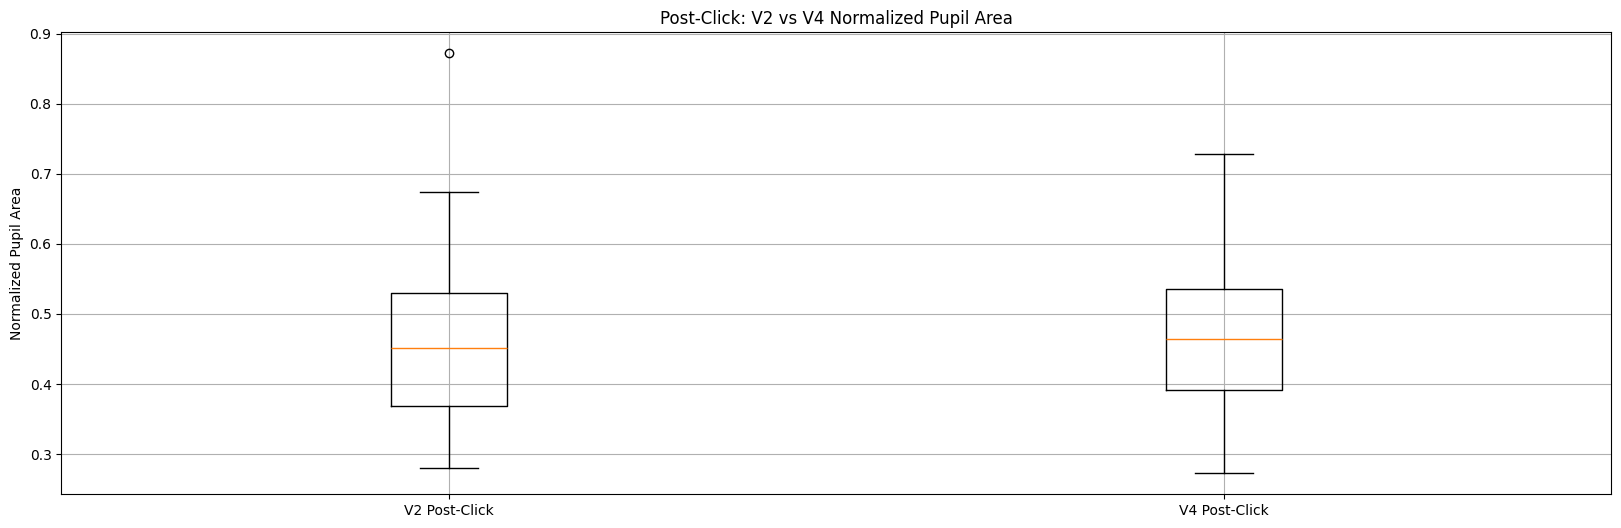

In [15]:
# File lists for V2 and V4
v2_mouse_files = ['aryaman2.csv', 'jain2.csv', 'priyanshu2.csv', 'rhea2.csv', 'amog2.csv','priyansh2.csv','priyanshu2.csv','suhani2.csv','surabhi2.csv','tanya2.csv','trusha2.csv','vaish2.csv']
v2_pupil_files = ['aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv', 'amog_v2.csv', 'priyansh_v2.csv', 'priyanshu_v2.csv', 'suhani_v2.csv','surabhi_v2.csv', 'tanya_v2.csv', 'trusha_v2.csv', 'vaish_v2.csv']

v4_mouse_files = ['aryaman4.csv', 'jain4.csv', 'priyanshu4.csv', 'rhea4.csv', 'amog4.csv','priyansh4.csv','priyanshu4.csv','suhani4.csv','surabhi4.csv','tanya4.csv','trusha4.csv','vaish4.csv']
v4_pupil_files = ['aryamann_v4.csv', 'jain_v4.csv', 'priyanshu_v4.csv', 'rhea_v4.csv',  'amog_v4.csv', 'priyansh_v4.csv', 'priyanshu_v4.csv', 'suhani_v4.csv','surabhi_v4.csv', 'tanya_v4.csv', 'trusha_v4.csv', 'vaish_v4.csv']

# Compare V2 and V4
combined_v2, combined_v4 = compare_versions(v2_mouse_files, v2_pupil_files, v4_mouse_files, v4_pupil_files)

# 1. Compare Pre-Click vs Post-Click in V2
print("### V2 Pre-Click vs Post-Click ###")
print(combined_v2.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([combined_v2['Pre-Click Avg Pupil Area'].dropna(),
             combined_v2['Post-Click Avg Pupil Area'].dropna()],
            labels=['V2 Pre-Click', 'V2 Post-Click'])
plt.title("V2: Pre-Click vs Post-Click Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()

# 2. Compare Pre-Click vs Post-Click in V4
print("### V4 Pre-Click vs Post-Click ###")
print(combined_v4.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([combined_v4['Pre-Click Avg Pupil Area'].dropna(),
             combined_v4['Post-Click Avg Pupil Area'].dropna()],
            labels=['V4 Pre-Click', 'V4 Post-Click'])
plt.title("V4: Pre-Click vs Post-Click Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()

# 3. Compare Post-Click in V2 vs Post-Click in V4
print("### Post-Click: V2 vs V4 ###")
post_click_v2 = combined_v2['Post-Click Avg Pupil Area'].dropna()
post_click_v4 = combined_v4['Post-Click Avg Pupil Area'].dropna()

comparison_df = pd.DataFrame({'V2 Post-Click': post_click_v2, 'V4 Post-Click': post_click_v4})
print(comparison_df.describe())

plt.figure(figsize=(20, 6), dpi=100)
plt.boxplot([post_click_v2, post_click_v4], labels=['V2 Post-Click', 'V4 Post-Click'])
plt.title("Post-Click: V2 vs V4 Normalized Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()


Plotting V4 data for Anushka...


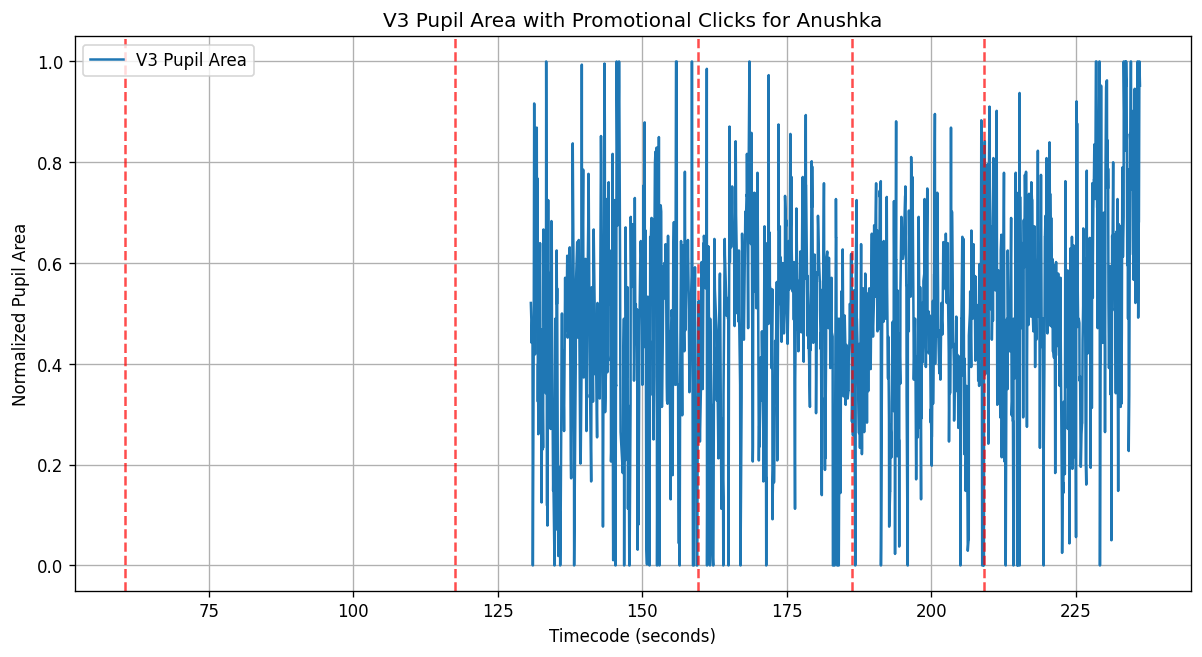

Plotting V4 data for Aryaman...


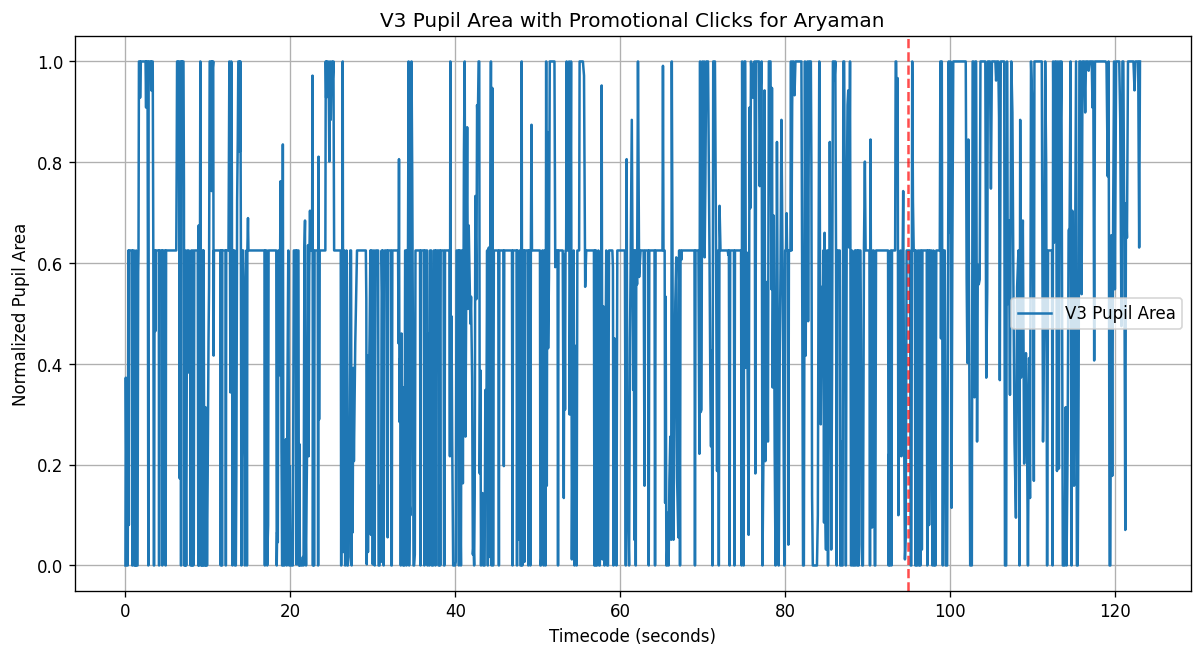

Plotting V4 data for Jain...


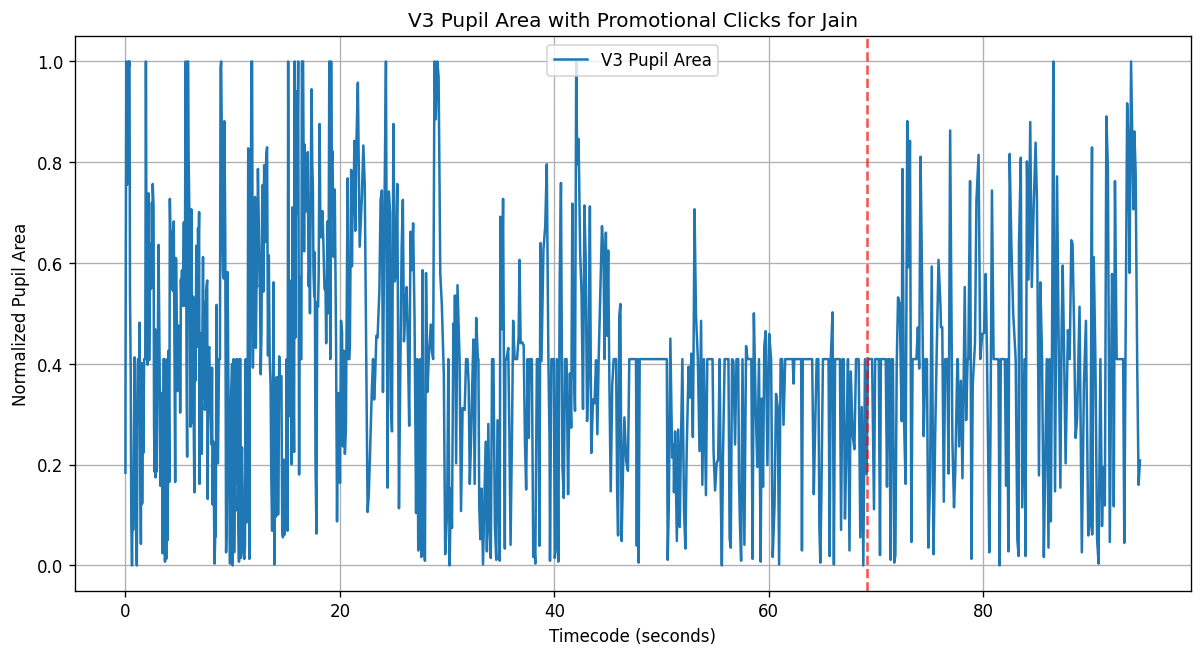

Plotting V4 data for Priyanshu...


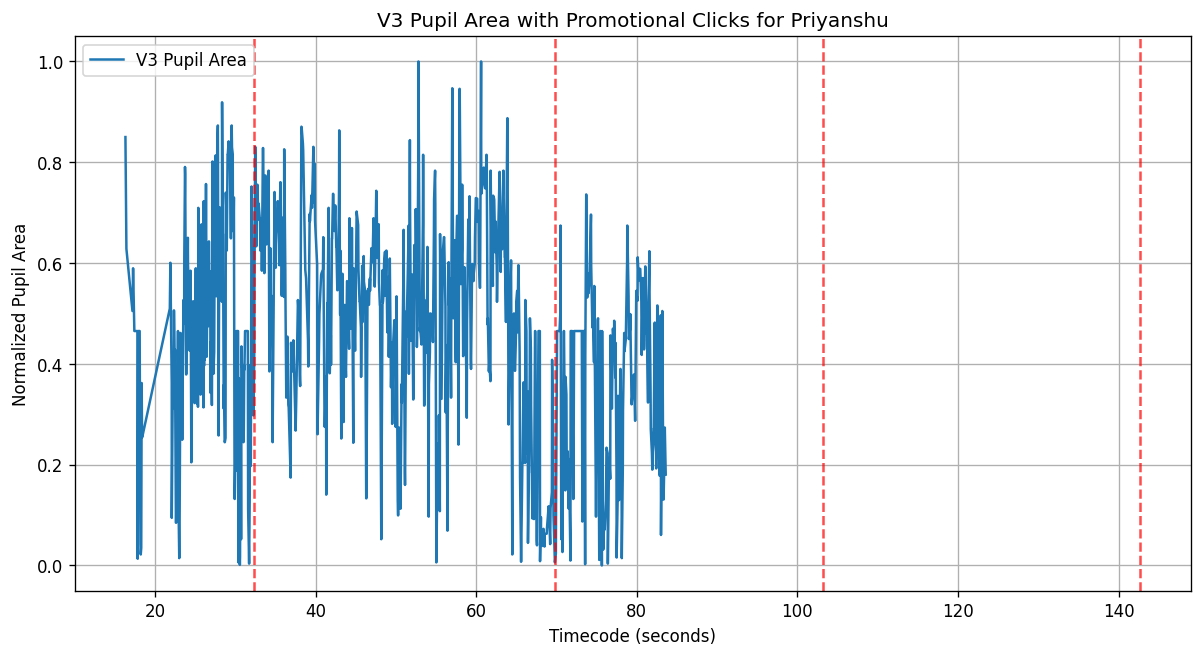

Plotting V4 data for Rhea...


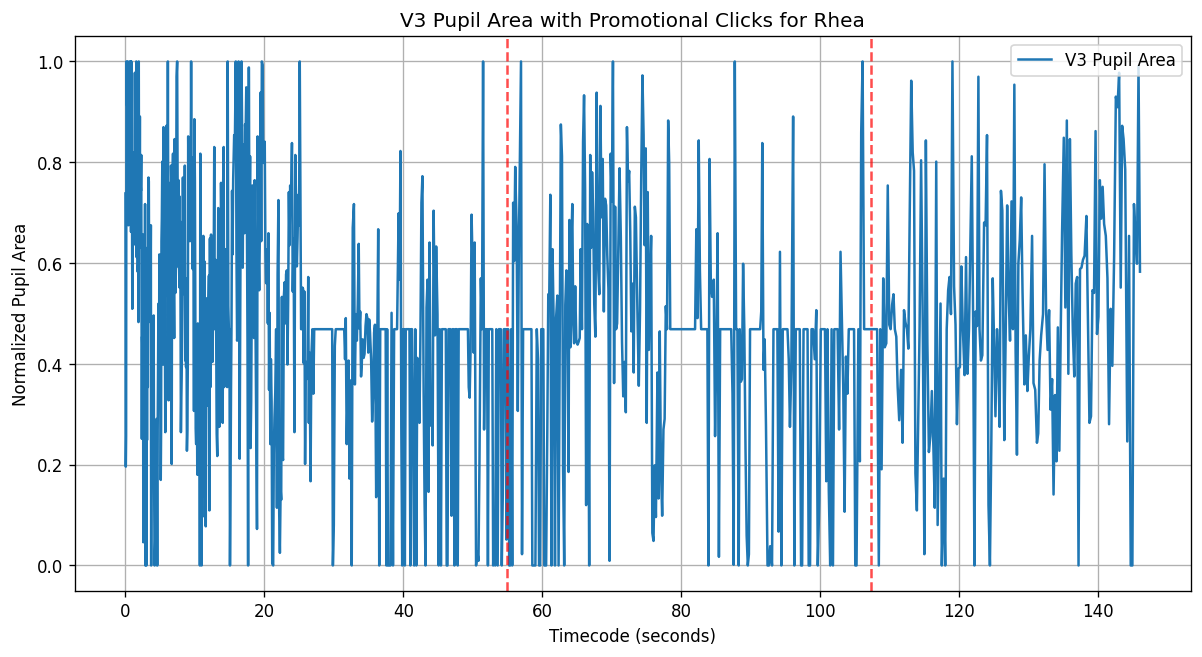

Plotting V4 data for Amog...


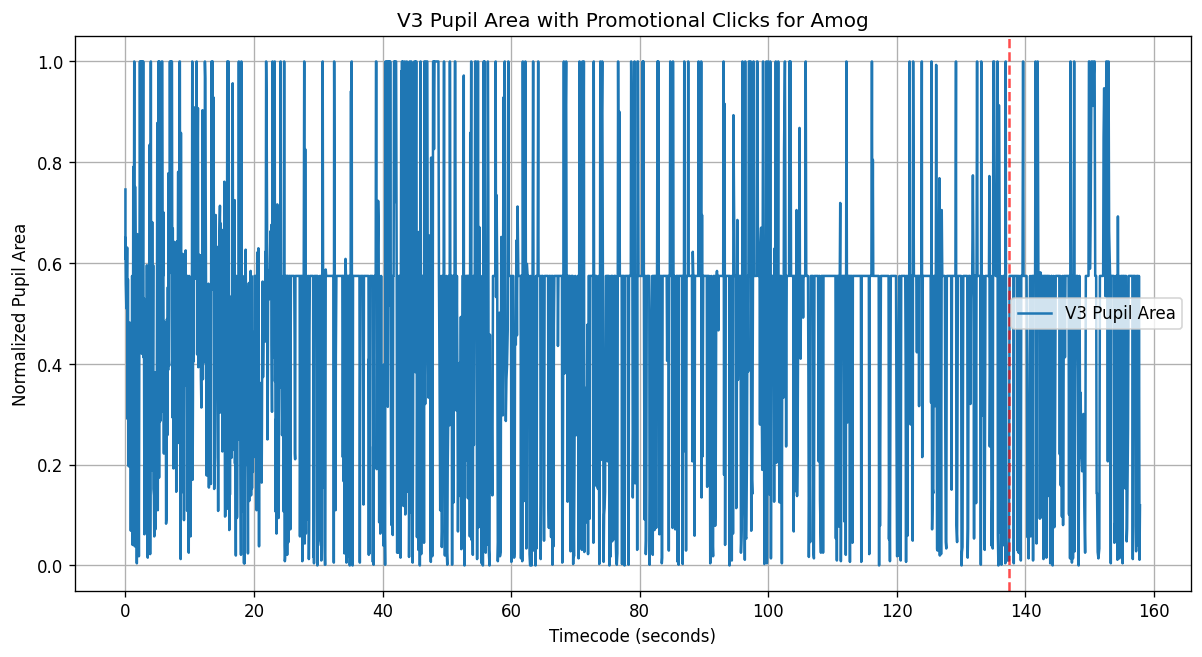

Plotting V4 data for Priyansh...


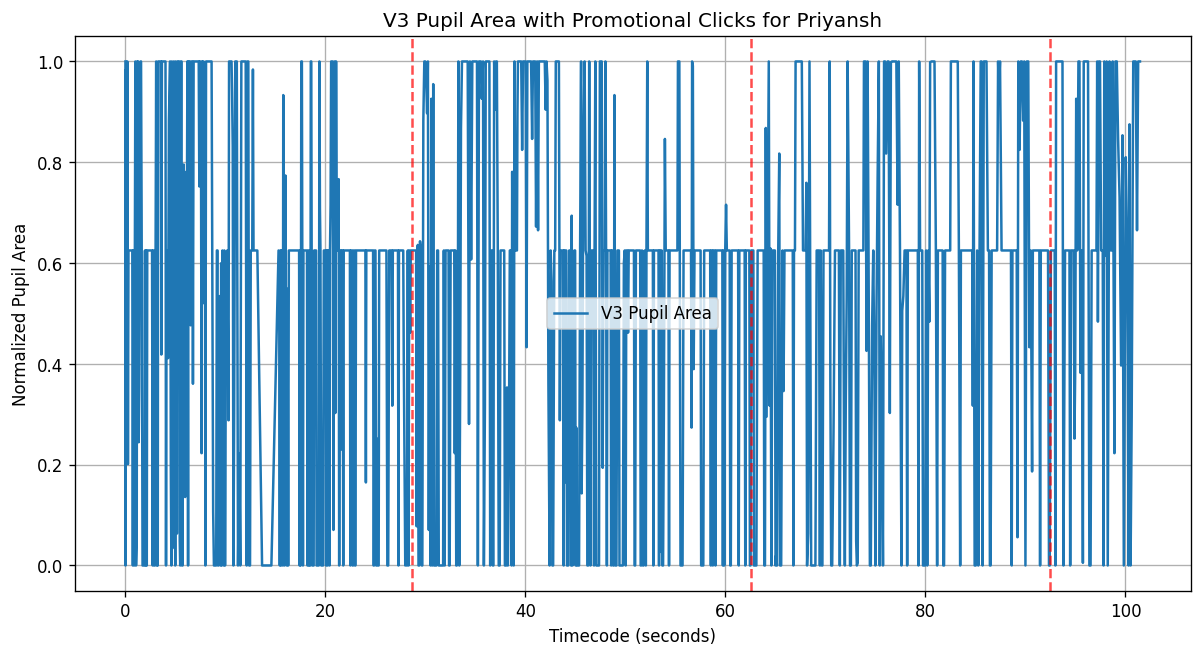

Plotting V4 data for Sani...


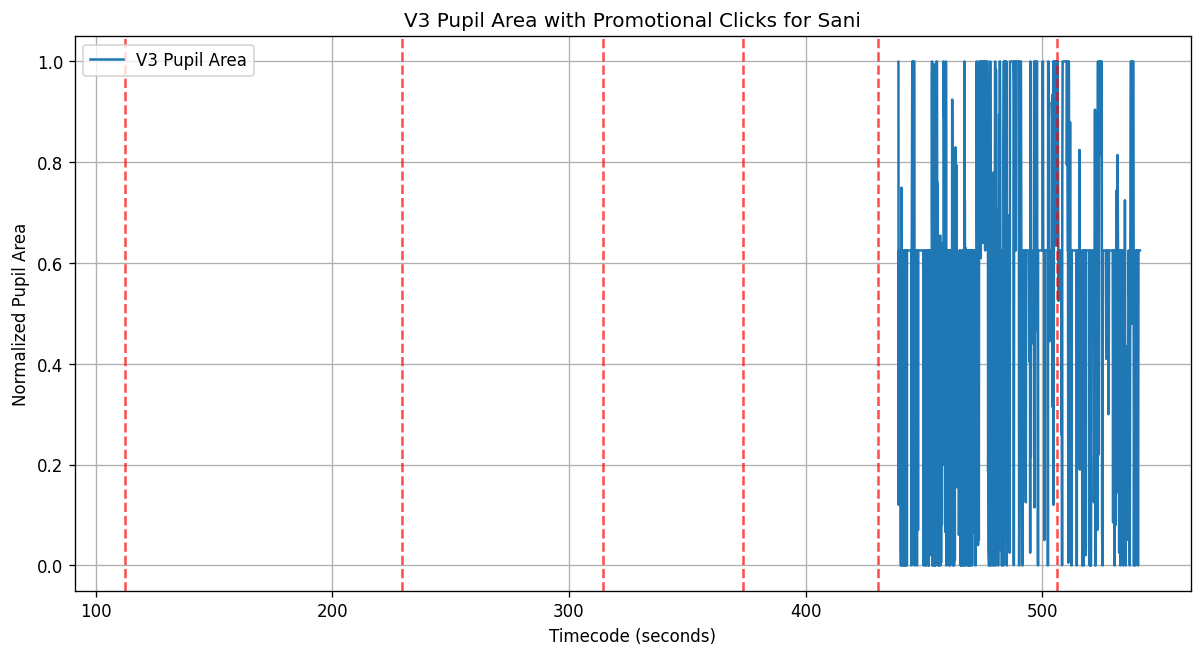

Plotting V4 data for Suhani...


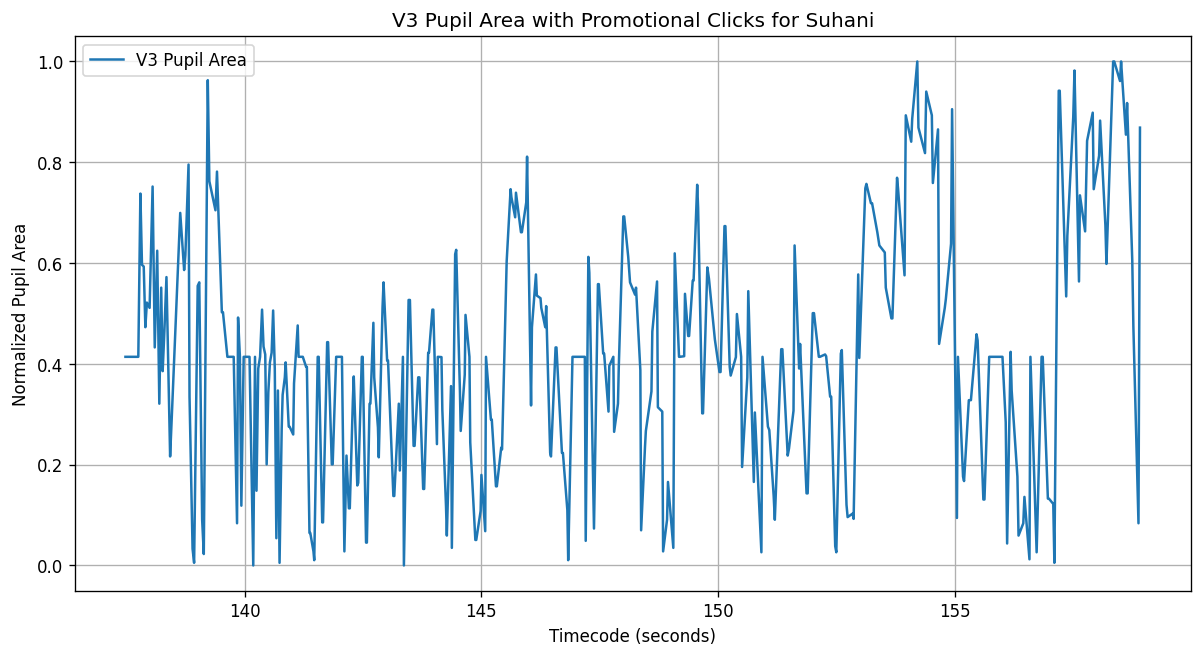

Plotting V4 data for Surabhi...


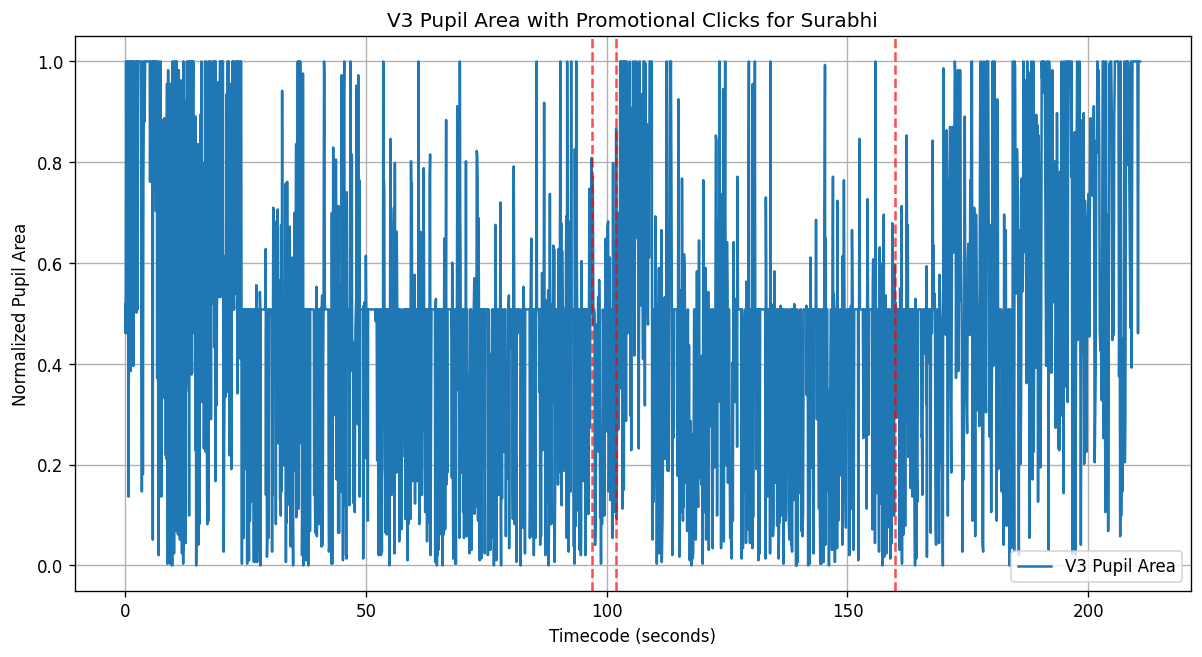

Plotting V4 data for Tanya...


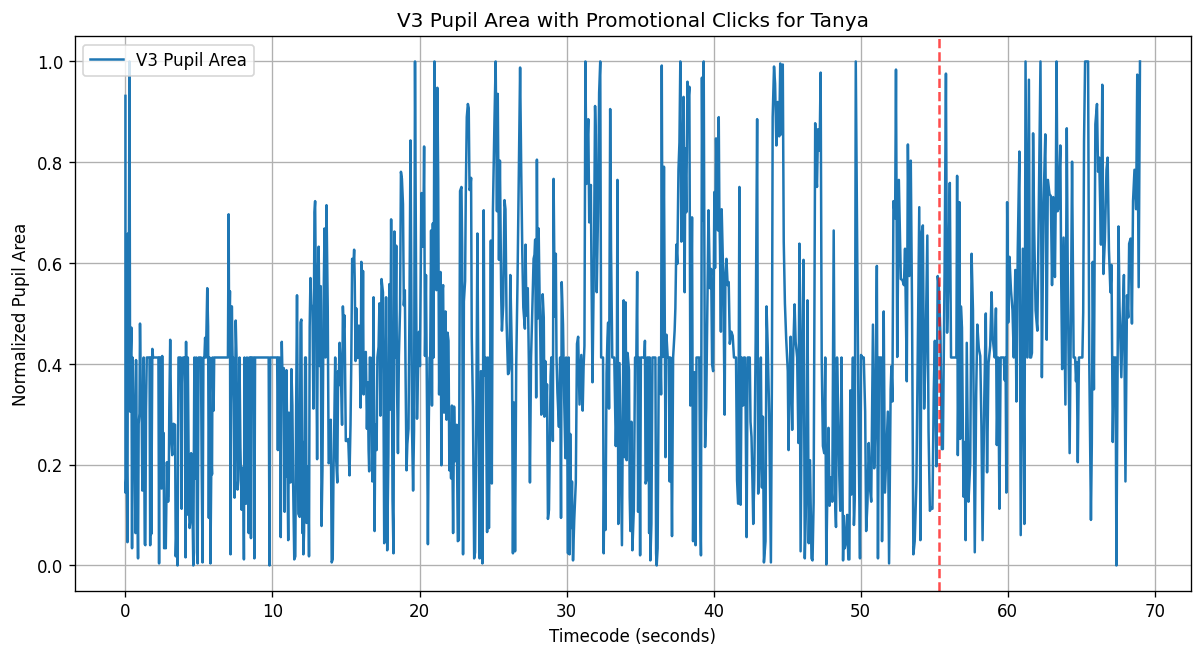

Plotting V4 data for Trusha...


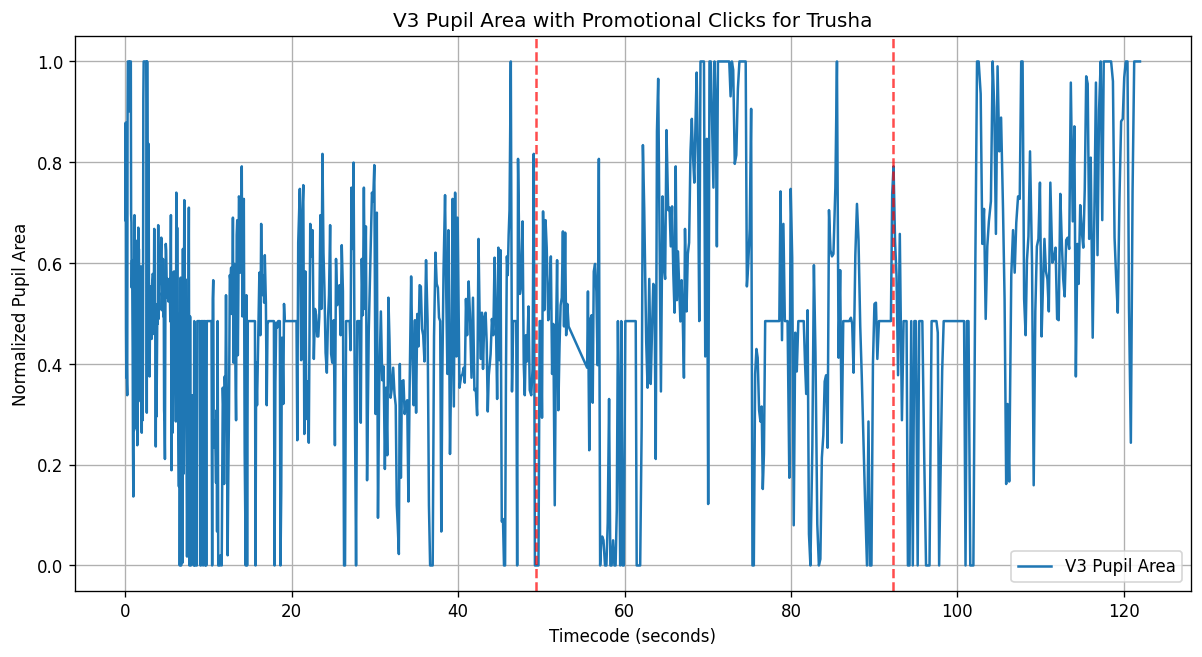

Plotting V4 data for Vaish...


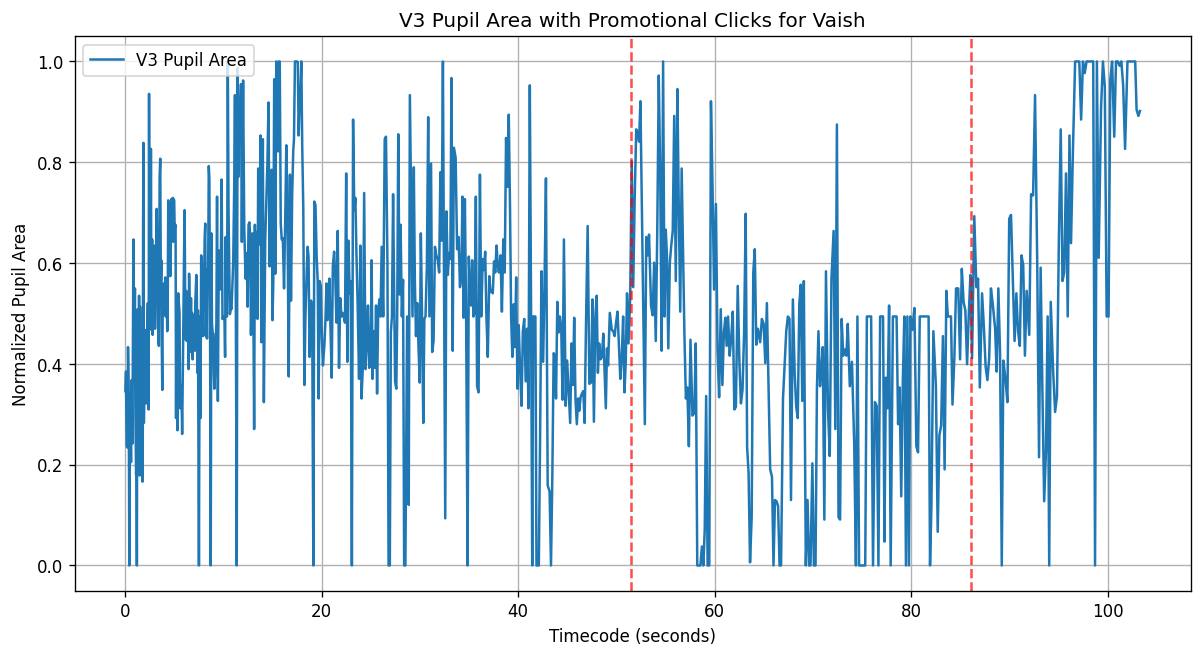

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and process pupil data
def load_and_process_v3_data(pupil_file, mouse_file):
    """
    Load and preprocess V3 pupil data and mouse click data.
    """
    # Load pupil data
    pupil_data = pd.read_csv(pupil_file)
    mouse_data = pd.read_csv(mouse_file)

    # Replace zeros with the mean of non-zero values
    non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
    pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)

    # Treat outliers using IQR
    Q1 = pupil_data['pupil-area'].quantile(0.25)
    Q3 = pupil_data['pupil-area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    pupil_data['pupil-area'] = pupil_data['pupil-area'].clip(lower=lower_bound, upper=upper_bound)

    # Normalize pupil area
    min_val = pupil_data['pupil-area'].min()
    max_val = pupil_data['pupil-area'].max()
    pupil_data['normalized-pupil-area'] = (pupil_data['pupil-area'] - min_val) / (max_val - min_val)

    return pupil_data, mouse_data[mouse_data['Is Promotional'] == True]

# Function to plot V3 pupil data with vertical lines for promotional clicks
def plot_v3_with_clicks(candidate_name, pupil_file, mouse_file):
    """
    Plots V3 normalized pupil area for a candidate with vertical lines for promotional clicks.
    """
    pupil_data, promo_clicks = load_and_process_v3_data(pupil_file, mouse_file)

    plt.figure(figsize=(12, 6), dpi=120)
    plt.plot(pupil_data['timecode'], pupil_data['normalized-pupil-area'], label='V3 Pupil Area')

    # Add vertical lines at promotional click times
    for _, click in promo_clicks.iterrows():
        plt.axvline(x=click['Timecode (seconds)'], color='red', linestyle='--', alpha=0.7)

    plt.title(f"V3 Pupil Area with Promotional Clicks for {candidate_name}")
    plt.xlabel("Timecode (seconds)")
    plt.ylabel("Normalized Pupil Area")
    plt.legend()
    plt.grid(True)
    plt.show()

# File paths for candidates and versions
candidates = {
    "Anushka": {
        "V2": {"pupil": "anuksha_v2.csv", "mouse": "anushka2.csv"},
        "V4": {"pupil": "anuksha_v4.csv", "mouse": "anushka4.csv"}
    },
    "Aryaman": {
        "V2": {"pupil": "aryamann_v2.csv", "mouse": "aryaman2.csv"},
        "V4": {"pupil": "aryamann_v4.csv", "mouse": "aryaman4.csv"}
    },
    "Jain": {
        "V2": {"pupil": "jain_v2.csv", "mouse": "jain2.csv"},
        "V4": {"pupil": "jain_v4.csv", "mouse": "jain4.csv"}
    },
    "Priyanshu": {
        "V2": {"pupil": "priyanshu_v2.csv", "mouse": "priyanshu2.csv"},
        "V4": {"pupil": "priyanshu_v4.csv", "mouse": "priyanshu4.csv"}
    },
    "Rhea": {
        "V2": {"pupil": "rhea_v2.csv", "mouse": "rhea2.csv"},
        "V4": {"pupil": "rhea_v4.csv", "mouse": "rhea4.csv"}
    },
    "Amog": {
        "V2": {"pupil": "amog_v2.csv", "mouse": "amog2.csv"},
        "V4": {"pupil": "amog_v4.csv", "mouse": "amog4.csv"}
    },
    "Priyansh": {
        "V2": {"pupil": "priyansh_v2.csv", "mouse": "priyansh2.csv"},
        "V4": {"pupil": "priyansh_v4.csv", "mouse": "priyansh4.csv"}
    },
    "Sani": {
        "V2": {"pupil": "sanidhya_v2.csv", "mouse": "sani2.csv"},
        "V4": {"pupil": "sanidhya_v4.csv", "mouse": "sani4.csv"}
    },
    "Suhani": {
        "V2": {"pupil": "suhani_v2.csv", "mouse": "suhani2.csv"},
        "V4": {"pupil": "suhani_v4.csv", "mouse": "suhani4.csv"}
    },
    "Surabhi": {
        "V2": {"pupil": "surabhi_v2.csv", "mouse": "surabhi2.csv"},
        "V4": {"pupil": "surabhi_v4.csv", "mouse": "surabhi4.csv"}
    },
    "Tanya": {
        "V2": {"pupil": "tanya_v2.csv", "mouse": "tanya2.csv"},
        "V4": {"pupil": "tanya_v4.csv", "mouse": "tanya4.csv"}
    },
    "Trusha": {
        "V2": {"pupil": "trusha_v2.csv", "mouse": "trusha2.csv"},
        "V4": {"pupil": "trusha_v4.csv", "mouse": "trusha4.csv"}
    },
    "Vaish": {
        "V2": {"pupil": "vaish_v2.csv", "mouse": "vaish2.csv"},
        "V4": {"pupil": "vaish_v4.csv", "mouse": "vaish4.csv"}
    }
}


# Plot graphs for each candidate
for candidate, files in candidates.items():
    print(f"Plotting V4 data for {candidate}...")
    plot_v3_with_clicks(candidate, files['V4']['pupil'], files['V4']['mouse'])


Valid V1 Means Count: 5, Valid V2 Post-Click Count: 19
### V1 Average Pupil Area vs V2 Post-Click Pupil Area ###
       V1 Average Pupil Area  V2 Post-Click Pupil Area
count               4.000000                  5.000000
mean                0.447216                  0.487098
std                 0.061594                  0.070251
min                 0.372303                  0.395249
25%                 0.409045                  0.463842
50%                 0.458161                  0.464767
75%                 0.496332                  0.535559
max                 0.500237                  0.576073


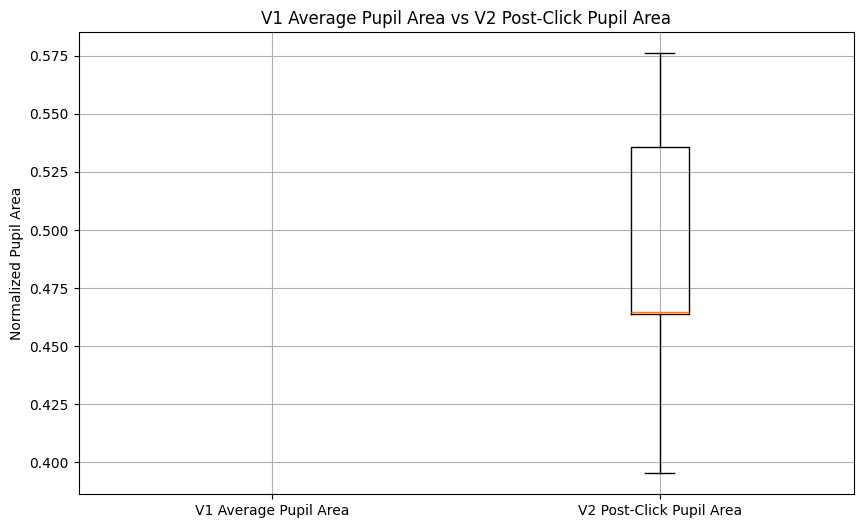

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process V1 user data (overall stats)
def process_v1_data(pupil_file):
    """
    Processes V1 pupil data to calculate overall average normalized pupil area.
    """
    pupil_data = pd.read_csv(pupil_file)

    # Replace zeros with the mean of non-zero values
    non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
    pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)

    # Treat outliers using IQR
    Q1 = pupil_data['pupil-area'].quantile(0.25)
    Q3 = pupil_data['pupil-area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    pupil_data['pupil-area'] = pupil_data['pupil-area'].clip(lower=lower_bound, upper=upper_bound)

    # Normalize pupil area
    min_val = pupil_data['pupil-area'].min()
    max_val = pupil_data['pupil-area'].max()
    pupil_data['normalized-pupil-area'] = (pupil_data['pupil-area'] - min_val) / (max_val - min_val)

    return pupil_data['normalized-pupil-area'].mean()

# Function to process V2 user data (post-click stats)
def process_v2_data(mouse_file, pupil_file):
    """
    Processes V2 pupil data and mouse click data to calculate post-click averages.
    """
    click_data = pd.read_csv(mouse_file)
    pupil_data = pd.read_csv(pupil_file)

    # Replace zeros with the mean of non-zero values
    non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
    pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)

    # Treat outliers using IQR
    Q1 = pupil_data['pupil-area'].quantile(0.25)
    Q3 = pupil_data['pupil-area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    pupil_data['pupil-area'] = pupil_data['pupil-area'].clip(lower=lower_bound, upper=upper_bound)

    # Normalize pupil area
    min_val = pupil_data['pupil-area'].min()
    max_val = pupil_data['pupil-area'].max()
    pupil_data['normalized-pupil-area'] = (pupil_data['pupil-area'] - min_val) / (max_val - min_val)

    # Filter for post-click stats
    results = []
    for _, click_row in click_data[click_data['Is Promotional'] == True].iterrows():
        click_time = click_row['Timecode (seconds)']
        post_click = pupil_data[(pupil_data['timecode'] >= click_time + 2) & (pupil_data['timecode'] < click_time + 5)]
        if not post_click['normalized-pupil-area'].empty:
            results.append(post_click['normalized-pupil-area'].mean())

    return results

# Compare V1 Overall vs V2 Post-Click
def compare_v1_v2(v1_pupil_files, v2_mouse_files, v2_pupil_files):
    v1_means = []
    v2_post_click = []

    # Process V1: Get overall averages
    for v1_pupil in v1_pupil_files:
        v1_means.append(process_v1_data(v1_pupil))

    # Process V2: Get post-click averages
    for v2_mouse, v2_pupil in zip(v2_mouse_files, v2_pupil_files):
        v2_post_click.extend(process_v2_data(v2_mouse, v2_pupil))

    return v1_means, v2_post_click

# File lists for V1 and V2
v1_pupil_files = ['anuksha_v1.csv', 'aryamann_v1.csv', 'jain_v1.csv', 'priyanshu_v1.csv', 'rhea_v1.csv']
v2_mouse_files = ['anushka2.csv', 'aryaman2.csv', 'jain2.csv', 'priyanshu2.csv', 'rhea2.csv']
v2_pupil_files = ['anuksha_v2.csv', 'aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv']

# Compare V1 and V2
v1_means, v2_post_click = compare_v1_v2(v1_pupil_files, v2_mouse_files, v2_pupil_files)

# Debugging output
print(f"Valid V1 Means Count: {len(v1_means)}, Valid V2 Post-Click Count: {len(v2_post_click)}")

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    'V1 Average Pupil Area': v1_means,
    'V2 Post-Click Pupil Area': v2_post_click[:len(v1_means)]  # Match lengths
})

# Print summary statistics
print("### V1 Average Pupil Area vs V2 Post-Click Pupil Area ###")
print(comparison_df.describe())

# Plot V1 Average vs V2 Post-Click
plt.figure(figsize=(10, 6), dpi=100)
plt.boxplot([comparison_df['V1 Average Pupil Area'], comparison_df['V2 Post-Click Pupil Area']],
            labels=['V1 Average Pupil Area', 'V2 Post-Click Pupil Area'])
plt.title("V1 Average Pupil Area vs V2 Post-Click Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()


### V1 vs V2 Average Pupil Area Comparison ###
       V1 Average Pupil Area  V2 Average Pupil Area
count               5.000000               5.000000
mean              316.179820             277.874877
std               129.864699             178.093004
min               167.689119              90.598958
25%               278.818668             180.399504
50%               301.310669             228.654696
75%               307.801039             335.079800
max               525.279605             554.641429


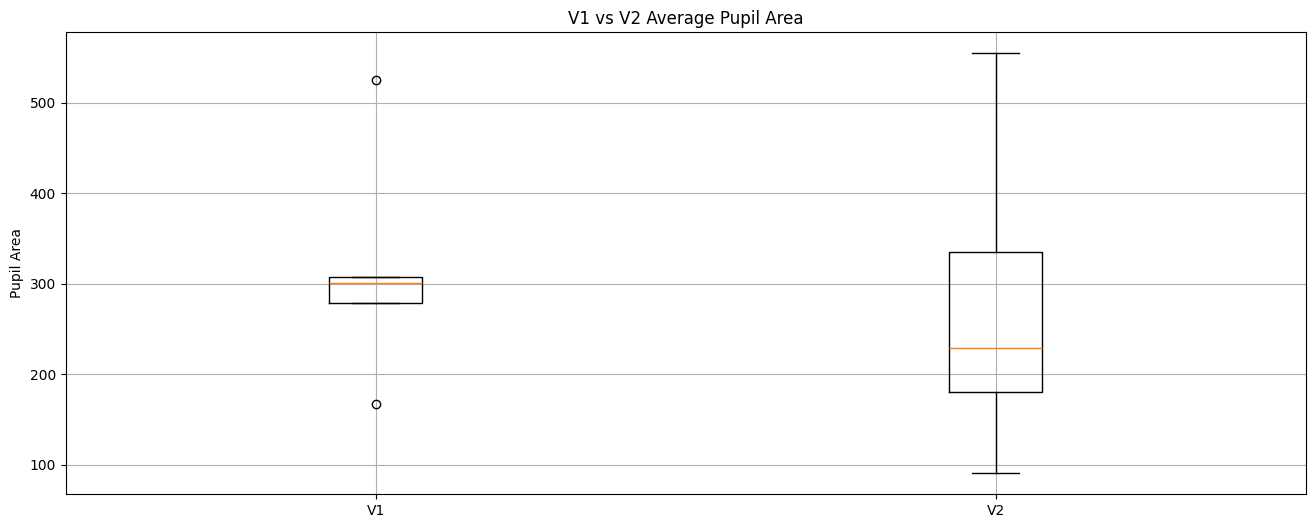

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate overall average pupil area
def calculate_average_pupil_area(pupil_files):
    averages = []
    for file in pupil_files:
        # Load pupil data
        pupil_data = pd.read_csv(file)
        
        # Replace zeros with the mean of non-zero values
        non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
        pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)
        
        # # Treat outliers using IQR
        # Q1 = pupil_data['pupil-area'].quantile(0.25)
        # Q3 = pupil_data['pupil-area'].quantile(0.75)
        # IQR = Q3 - Q1
        # lower_bound = Q1 - 1.5 * IQR
        # upper_bound = Q3 + 1.5 * IQR
        # pupil_data['pupil-area'] = pupil_data['pupil-area'].clip(lower=lower_bound, upper=upper_bound)
        
        # Calculate average pupil area
        avg_pupil_area = pupil_data['pupil-area'].mean()
        averages.append(avg_pupil_area)
    return averages

# File lists for V1 and V2
v1_pupil_files = ['anuksha_v1.csv', 'aryamann_v1.csv', 'jain_v1.csv', 'priyanshu_v1.csv', 'rhea_v1.csv']
v2_pupil_files = ['anuksha_v2.csv', 'aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv']

# Calculate averages for V1 and V2
v1_averages = calculate_average_pupil_area(v1_pupil_files)
v2_averages = calculate_average_pupil_area(v2_pupil_files)

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    'V1 Average Pupil Area': v1_averages,
    'V2 Average Pupil Area': v2_averages
})

# Print summary statistics
print("### V1 vs V2 Average Pupil Area Comparison ###")
print(comparison_df.describe())

# Plot V1 vs V2 averages
plt.figure(figsize=(16, 6), dpi=100)
plt.boxplot([comparison_df['V1 Average Pupil Area'], comparison_df['V2 Average Pupil Area']],
            labels=['V1', 'V2'])
plt.title("V1 vs V2 Average Pupil Area")
plt.ylabel("Pupil Area")
plt.grid(True)
plt.show()


### V1 vs V2 Normalized Average Pupil Area Comparison ###
       V1 Normalized Average Pupil Area  V2 Normalized Average Pupil Area
count                          5.000000                          5.000000
mean                           0.325210                          0.307311
std                            0.129718                          0.176633
min                            0.199582                          0.192272
25%                            0.215639                          0.192695
50%                            0.285396                          0.201739
75%                            0.455016                          0.350238
max                            0.470416                          0.599608


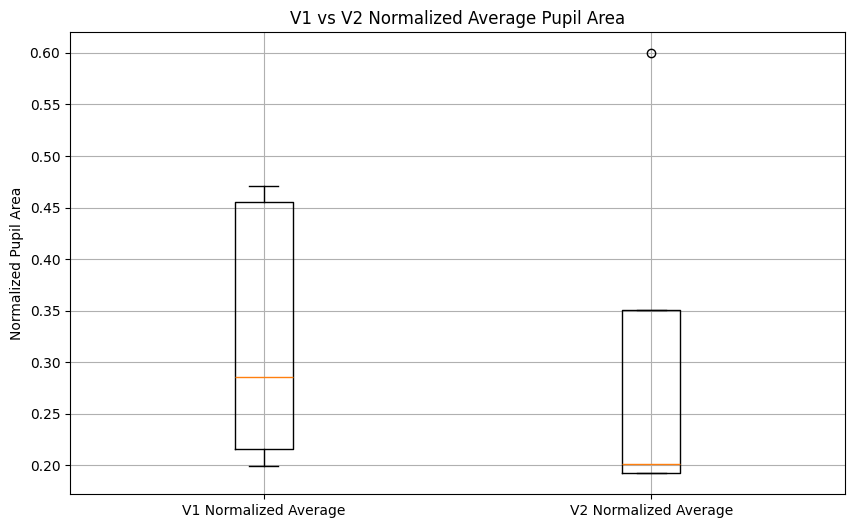

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate normalized average pupil area
def calculate_normalized_average_pupil_area(pupil_files):
    averages = []
    for file in pupil_files:
        # Load pupil data
        pupil_data = pd.read_csv(file)
        
        # Replace zeros with the mean of non-zero values
        non_zero_mean = pupil_data.loc[pupil_data['pupil-area'] > 0, 'pupil-area'].mean()
        pupil_data['pupil-area'] = pupil_data['pupil-area'].replace(0, non_zero_mean)
        
        # Min-Max normalization
        min_val = pupil_data['pupil-area'].min()
        max_val = pupil_data['pupil-area'].max()
        pupil_data['normalized-pupil-area'] = (pupil_data['pupil-area'] - min_val) / (max_val - min_val)
        
        # Calculate average normalized pupil area
        avg_pupil_area = pupil_data['normalized-pupil-area'].mean()
        averages.append(avg_pupil_area)
    return averages

# File lists for V1 and V2
v1_pupil_files = ['anuksha_v1.csv', 'aryamann_v1.csv', 'jain_v1.csv', 'priyanshu_v1.csv', 'rhea_v1.csv']
v2_pupil_files = ['anuksha_v2.csv', 'aryamann_v2.csv', 'jain_v2.csv', 'priyanshu_v2.csv', 'rhea_v2.csv']

# Calculate normalized averages for V1 and V2
v1_averages = calculate_normalized_average_pupil_area(v1_pupil_files)
v2_averages = calculate_normalized_average_pupil_area(v2_pupil_files)

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    'V1 Normalized Average Pupil Area': v1_averages,
    'V2 Normalized Average Pupil Area': v2_averages
})

# Print summary statistics
print("### V1 vs V2 Normalized Average Pupil Area Comparison ###")
print(comparison_df.describe())

# Plot V1 vs V2 averages
plt.figure(figsize=(10, 6), dpi=100)
plt.boxplot([comparison_df['V1 Normalized Average Pupil Area'], comparison_df['V2 Normalized Average Pupil Area']],
            labels=['V1 Normalized Average', 'V2 Normalized Average'])
plt.title("V1 vs V2 Normalized Average Pupil Area")
plt.ylabel("Normalized Pupil Area")
plt.grid(True)
plt.show()
